# 17.Proje-Stroke Prediction by 123 of AI-Felç Hastalığı Tahmini
# Classification

Bu yarışmanın amacı, kişinin felç geçirip geçirmeyeceğini belirlemek için makine öğrenimi kullanarak bir çözüm geliştirmektir. Bu çözüm, kişinin yaşına, işinin doğasına, şehirde/taşrada yaşayıp yaşamadığına, medeni durumuna ve çeşitli klinik parametrelere dayanmalıdır.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings 
warnings.simplefilter("ignore")

In [2]:
dftrain=pd.read_csv("stroke_train_set.csv")

In [3]:
dftest=pd.read_csv("stroke_test_set_nogt.csv")

In [4]:
dftrain.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,47.0,0,0,Yes,Private,Urban,63.98,26.8,smokes,0
1,Male,54.0,0,0,Yes,Private,Urban,86.26,35.1,formerly smoked,0
2,Female,3.0,0,0,No,children,Rural,68.34,18.0,Unknown,0
3,Female,62.0,0,0,Yes,Private,Rural,226.38,47.4,never smoked,0
4,Female,27.0,0,0,Yes,Private,Rural,85.60,21.4,Unknown,0


1. **gender (Cinsiyet)**: Bireyin cinsiyetini belirtir (örneğin, "Male" veya "Female").

2. **age (Yaş)**: Bireyin yaşı. Yaş, tam sayılar ve ondalık sayılarla ifade edilebilir.

3. **hypertension (Hipertansiyon Durumu)**: Bireyin hipertansiyon olup olmadığını gösteren bir özellik. 1, hipertansiyonlu olduğunu; 0, hipertansiyonlu olmadığını ifade eder.

4. **heart_disease (Kalp Hastalığı Durumu)**: Bireyin kalp hastalığı olup olmadığını gösteren bir özellik. 1, kalp hastalığı olan; 0, kalp hastalığı olmayan.

5. **ever_married (Evlenme Durumu)**: Bireyin evlenip evlenmediğini gösterir. "Yes" evlendiği durumu, "No" ise evlenmediği durumu ifade eder.

6. **work_type (Çalışma Tipi)**: Bireyin çalışma tipini belirtir. "Private" özel sektörde çalıştığını, "children" çocuk olduğunu, ve diğer olası değerlerin de farklı çalışma tiplerini ifade ettiğini gösterir.Private (Özel Sektör): Bu kategoriye ait birey sayısı 2332'dir. Bu kişilerin özel sektörde çalıştıkları anlamına gelir.

Self-employed (Serbest Çalışan): Bu kategoriye ait birey sayısı 666'dır. Bu kişilerin kendi işlerini yaptıkları veya serbest meslek sahibi oldukları anlamına gelir.

Children (Çocuklar): Bu kategoriye ait birey sayısı 548'dir. Bu, çocukların çalışma yaşı olmadığı ve bu nedenle bu bireylerin çalışma tipinin "çocuklar" olarak etiketlendiği anlamına gelir.

Govt_job (Devlet Sektörü): Bu kategoriye ait birey sayısı 528'dir. Bu kişilerin devlet sektöründe çalıştıkları anlamına gelir.

Never_worked (Hiç Çalışmamış): Bu kategori, "Never worked" ifadesi kullanılarak belirtilmiş ancak ilgili birey sayısı belirtilmemiştir. Bu genellikle, hiçbir zaman resmi bir işte çalışmamış olan bireyleri temsil eder.

7. **Residence_type (Yaşadığı Bölge Tipi)**: Bireyin yaşadığı bölgenin tipini ifade eder. "Urban" şehirde yaşadığını, "Rural" ise kırsalda yaşadığını gösterir.

8. **avg_glucose_level (Ortalama Glikoz Seviyesi)**: Bireyin ortalama glikoz seviyesini ifade eden bir sayısal değer.

9. **bmi (Vücut Kitle İndeksi)**: Bireyin vücut kitle indeksini ifade eden bir sayısal değer.
Zayıf (Underweight): BMI 18.5'in altında
Normal (Normal weight): BMI 18.5 ile 24.9 arasında
Fazla Kilolu (Overweight): BMI 25 ile 29.9 arasında
Obez (Obese): BMI 30 ve üzeri
10. **smoking_status (Sigara İçme Durumu)**: Bireyin sigara içip içmediğini belirten bir özellik. "smokes" içiyorsa, "formerly smoked" eskiden içiyordu, "never smoked" hiç içmediği ve "Unknown" bilinmeyen durumu ifade eder.

11. **stroke (Felç Durumu)**: Bireyin felç geçirip geçirmediğini belirtir. 1, felç geçirdiği; 0, felç geçirmediği durumu ifade eder.

Bu özellikler, her bir bireyin özelliklerini ve felç geçirme durumunu belirten bir veri setini temsil eder. Bu tür veri setleri genellikle makine öğrenimi modelleri için eğitim ve değerlendirme amacıyla kullanılır.

In [5]:
# EDA
import ydata_profiling
dftrain.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
print(dftrain.shape)
print(dftest.shape)

(4088, 11)
(1022, 10)


In [7]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4088 non-null   object 
 1   age                4088 non-null   float64
 2   hypertension       4088 non-null   int64  
 3   heart_disease      4088 non-null   int64  
 4   ever_married       4088 non-null   object 
 5   work_type          4088 non-null   object 
 6   Residence_type     4088 non-null   object 
 7   avg_glucose_level  4088 non-null   float64
 8   bmi                3926 non-null   float64
 9   smoking_status     4088 non-null   object 
 10  stroke             4088 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 351.4+ KB


In [8]:
dftrain["smoking_status"].value_counts()

never smoked       1517
Unknown            1239
formerly smoked     698
smokes              634
Name: smoking_status, dtype: int64

In [9]:
# Korelasyonu daha sohhatli görmek için bazı objeleri sayısal değerlere çevirelim
dftrain['gender'] = dftrain['gender'].replace({'Female': 1, 'Male': 0, 'Other': 0}).astype(int)
dftrain['ever_married'] = dftrain['ever_married'].replace({'Yes': 1, 'No': 0}).astype(int)
dftrain['work_type'] = dftrain['work_type'].replace({'Private': 1, 'Self-employed': 2, "children": 3, "Govt_job": 4, "Never_worked": 0}).astype(int)
dftrain['Residence_type'] = dftrain['Residence_type'].replace({'Urban': 1, 'Rural': 0}).astype(int)
dftrain['smoking_status'] = dftrain['smoking_status'].replace({'never smoked': 0, "Unknown": 0, 'formerly smoked': 1, "smokes": 1}).astype(int)

In [10]:
dftrain.corr()['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.237228
heart_disease        0.140268
avg_glucose_level    0.138229
hypertension         0.115834
ever_married         0.112674
smoking_status       0.055248
bmi                  0.042246
Residence_type       0.014647
gender              -0.002812
work_type           -0.023818
Name: stroke, dtype: float64

In [11]:
dftrain.isnull().sum() # korelasyonla çok bir alakası olmadığından 0 ile doldurabiliriz

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  162
smoking_status         0
stroke                 0
dtype: int64

In [12]:
dftrain['bmi'] = dftrain['bmi'].fillna(0)

<Axes: xlabel='hypertension', ylabel='count'>

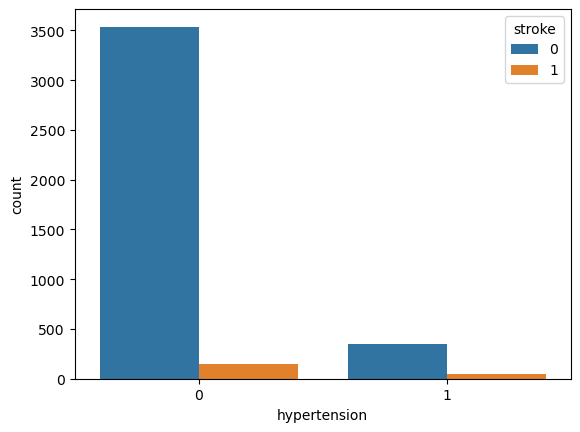

In [13]:
sns.countplot(data=dftrain, x="hypertension", hue="stroke")

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

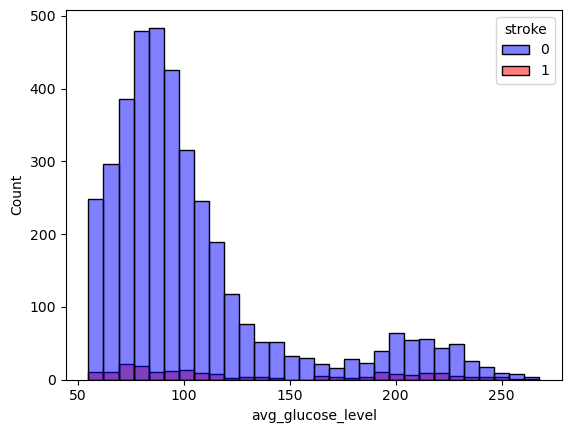

In [14]:
sns.histplot(data=dftrain, x='avg_glucose_level', hue='stroke', bins=30, palette={0: 'blue', 1: 'red'})

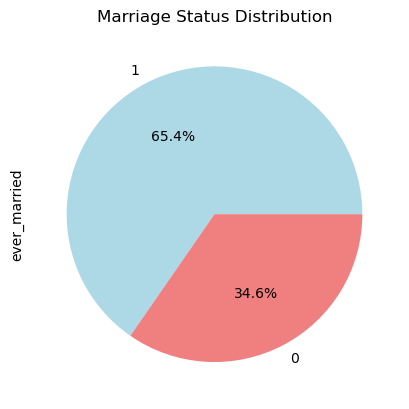

In [15]:
# Evlenme durumu (ever_married) sütunu için pie chart
dftrain['ever_married'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Marriage Status Distribution')
plt.show()

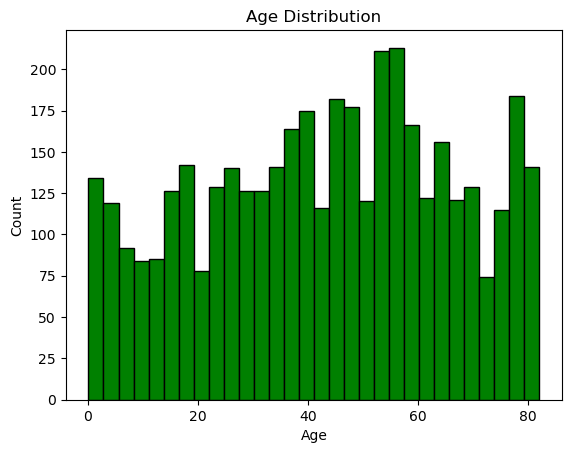

In [16]:
# Yaş (age) sütunu için histogram
dftrain['age'].plot(kind='hist', bins=30, color='green', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [17]:
# Modele Hazılrayıp, Modelleme
x=dftrain.drop(["stroke"],axis=1)
y=dftrain[["stroke"]]

In [18]:
def fnc_all_classification_models(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier 
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    from sklearn.model_selection import train_test_split
   
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [19]:
fnc_all_classification_models(x,y)

,accuracy_score
SVC,0.954768
BernoulliNB,0.953545
RandomForestClassifier,0.953545
LogisticRegression,0.952323
KNeighborsClassifier,0.949878
XGBClassifier,0.944988
DecisionTreeClassifier,0.908313
GaussianNB,0.858191


In [20]:
# Test verisini tahmin edelim 
dftest.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
1,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes
2,Female,60.0,0,0,No,Private,Urban,89.22,37.8,never smoked
3,Female,72.0,1,0,Yes,Private,Rural,74.63,23.1,formerly smoked
4,Male,81.0,0,0,Yes,Self-employed,Urban,99.33,33.7,never smoked


In [21]:
from sklearn.svm import SVC

In [22]:
SVC=SVC()

In [23]:
SVC.fit(x,y)

SVC()

In [24]:
tahmin=SVC.predict(x)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [26]:
accuracy_score(tahmin,y)

0.9510763209393346

In [27]:
print(classification_report(tahmin,y))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      4088
           1       0.00      0.00      0.00         0

    accuracy                           0.95      4088
   macro avg       0.50      0.48      0.49      4088
weighted avg       1.00      0.95      0.97      4088



In [28]:
dftest['stroke'] = 0

In [29]:
dftest.shape

(1022, 11)

In [30]:
dftest['gender'] = dftest['gender'].replace({'Female': 1, 'Male': 0, 'Other': 0}).astype(int)
dftest['ever_married'] = dftest['ever_married'].replace({'Yes': 1, 'No': 0}).astype(int)
dftest['work_type'] = dftest['work_type'].replace({'Private': 1, 'Self-employed': 2, "children": 3, "Govt_job": 4, "Never_worked": 0}).astype(int)
dftest['Residence_type'] = dftest['Residence_type'].replace({'Urban': 1, 'Rural': 0}).astype(int)
dftest['smoking_status'] = dftest['smoking_status'].replace({'never smoked': 0, "Unknown": 0, 'formerly smoked': 1, "smokes": 1}).astype(int)

In [31]:
dftrain.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [32]:
# NaN değerleri 0 ile doldur
dftest = dftest.fillna(0)

In [33]:
x= dftest.drop("stroke",axis=1)

In [34]:
dftest["stroke"]=SVC.predict(x)

In [35]:
d={0.0:"Hayir",1:"Evet"}

In [36]:
dftest["stroke"]=dftest["stroke"].map(d)

In [37]:
dftest

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,80.0,0,1,1,1,0,105.92,32.5,0,Hayir
1,0,75.0,1,0,1,1,1,221.29,25.8,1,Hayir
2,1,60.0,0,0,0,1,1,89.22,37.8,0,Hayir
3,1,72.0,1,0,1,1,0,74.63,23.1,1,Hayir
4,0,81.0,0,0,1,2,1,99.33,33.7,0,Hayir
...,...,...,...,...,...,...,...,...,...,...,...
1017,1,29.0,0,0,1,2,1,90.52,28.0,0,Hayir
1018,1,51.0,0,0,1,1,1,152.56,21.8,0,Hayir
1019,0,26.0,0,0,0,4,0,100.85,21.0,1,Hayir
1020,0,57.0,0,0,1,4,0,76.62,28.2,0,Hayir


In [38]:
# 'submission.csv' dosyasına tahmin sonuçlarını kaydedin
dftest.to_csv('submission.csv', index=False)